In [1]:
# We are gooing to do Customer Churn Analysis 
# Churn Analysis --- Means Customer is still with us or Customer leave the Company
# yes means Customer is leave the comapany
# No means Customer is still with us 

In [2]:
# import library

In [40]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [4]:
#load the dataset
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\EDA\\Customer Churn\\Customer Churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# Inspection of Data 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### replacing blank space with Zero and chnnage the data type 

In [10]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")    # here we replace the value 
df["TotalCharges"] = df["TotalCharges"].astype("float")     # here we change the data type 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# Check Null Value 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# Check the description of the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
# Now Check the Duplicate in the data set
df.duplicated().sum()

np.int64(0)

In [15]:
df["customerID"].duplicated().sum()

np.int64(0)

In [16]:
# converted 0 and 1 value of senior citizen with "yes" and "No"

In [17]:
# Now Making a function ["Senior Citizen"]
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "No"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

#### Now lets plot the count graph to check the how many customer still with the company and how many leave the company 

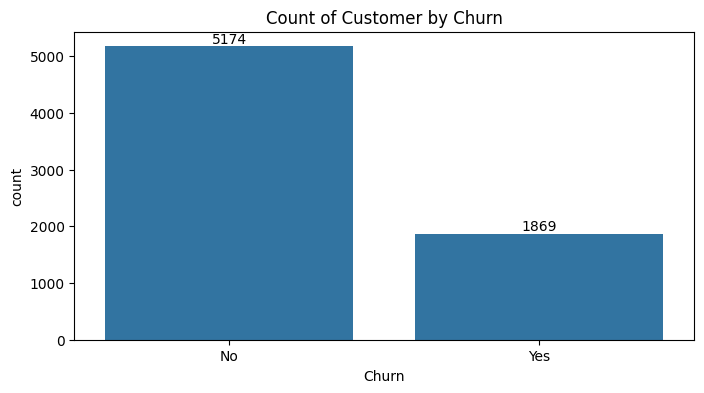

In [18]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x = 'Churn',data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()

### Pie Chart to calulate the percentage of the Customer 

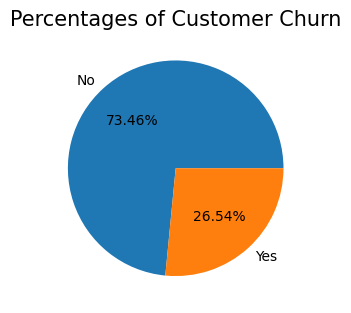

In [19]:
# if we want to check the same value in percentages 
plt.figure(figsize = (3.5,3.5))
gb = df.groupby("Churn").agg({"Churn":"count"})   #  value ko hum groupby karenge 
plt.pie(gb["Churn"],labels = gb.index,autopct = "%1.2f%%")
plt.title("Percentages of Customer Churn",fontsize = 15)
plt.show()

#### Based on "gender" How much Male Customer and How Much female Customer 

<function matplotlib.pyplot.show(close=None, block=None)>

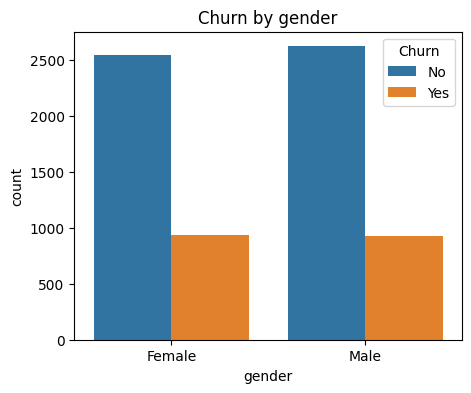

In [20]:
plt.figure(figsize = (5,4))
sns.countplot(x ='gender',data = df , hue = "Churn")
plt.title("Churn by gender")
plt.show

#### Based on "Cenior Citizen" how many person churned 

<function matplotlib.pyplot.show(close=None, block=None)>

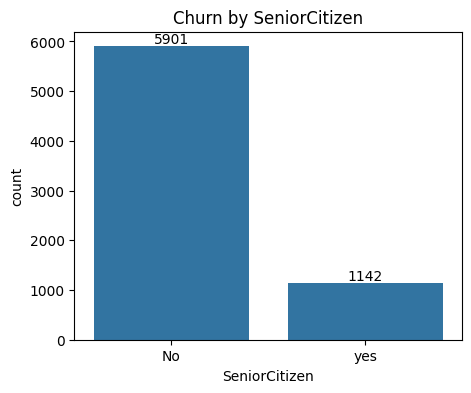

In [21]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x ='SeniorCitizen',data = df)
ax.bar_label(ax.containers[0])
plt.title("Churn by SeniorCitizen")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

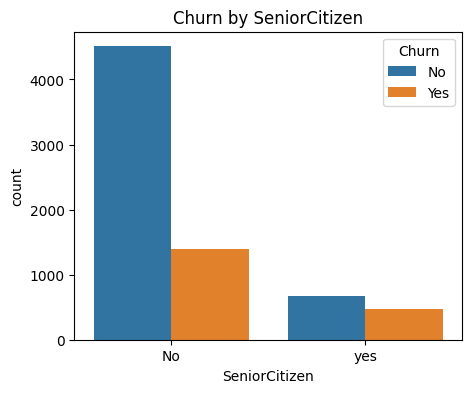

In [22]:
plt.figure(figsize = (5,4))
sns.countplot(x ='SeniorCitizen',data = df, hue = "Churn")
plt.title("Churn by SeniorCitizen")
plt.show

With the help of this graph we are able to find  the 1000 senoirCitizen Curned the Comnany

In [23]:
# with the help  of stack graph we analyze

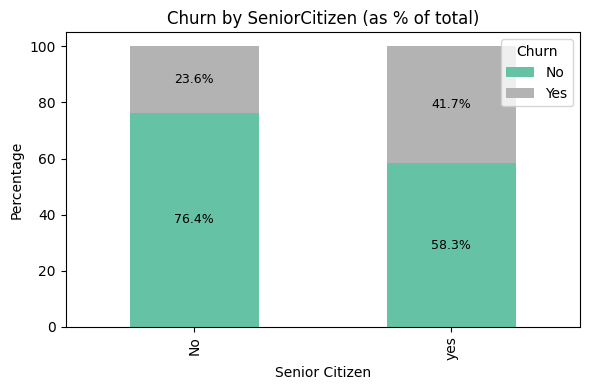

In [24]:
total = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100

# Step 2: Plot stacked bar chart
total.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Set2')

# Step 3: Add labels
for i, row in enumerate(total.values):
    bottom = 0
    for j, val in enumerate(row):
        plt.text(i, bottom + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=9)
        bottom += val

# Step 4: Set title and labels
plt.title("Churn by SeniorCitizen (as % of total)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

 #### Based on "Tenure" A person chaurn or not 

<function matplotlib.pyplot.show(close=None, block=None)>

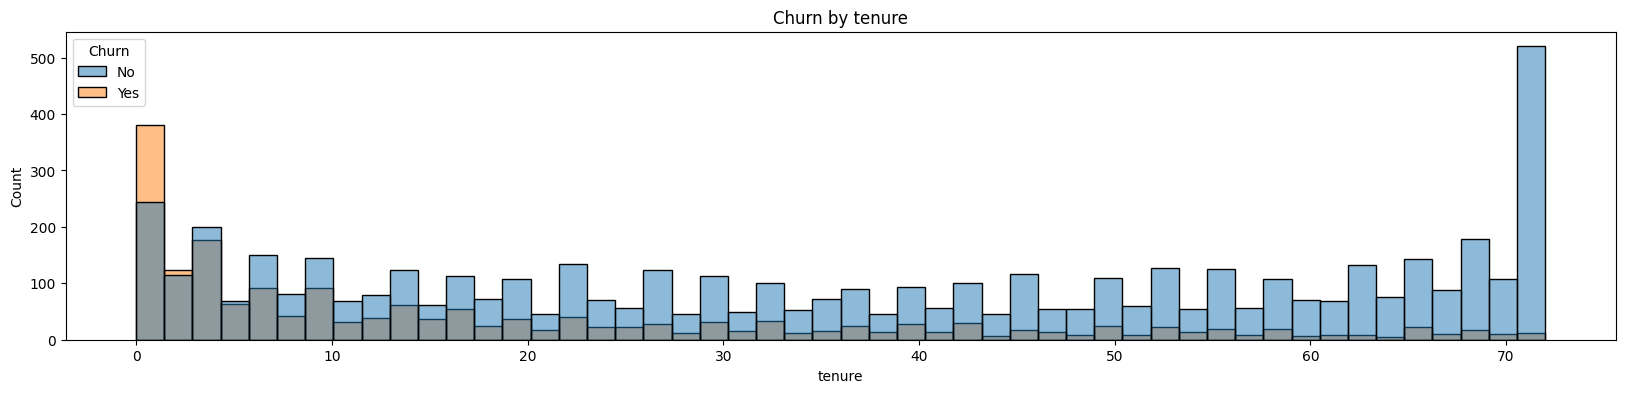

In [25]:
plt.figure(figsize = (20,4))
sns.histplot(x ='tenure',data = df, bins = 50, hue = "Churn")
plt.title("Churn by tenure")
plt.show

People who have used our service for a long time have stayed and people who have used our services shorted time they churned 

### Baed on "Contract" who churn the company

<function matplotlib.pyplot.show(close=None, block=None)>

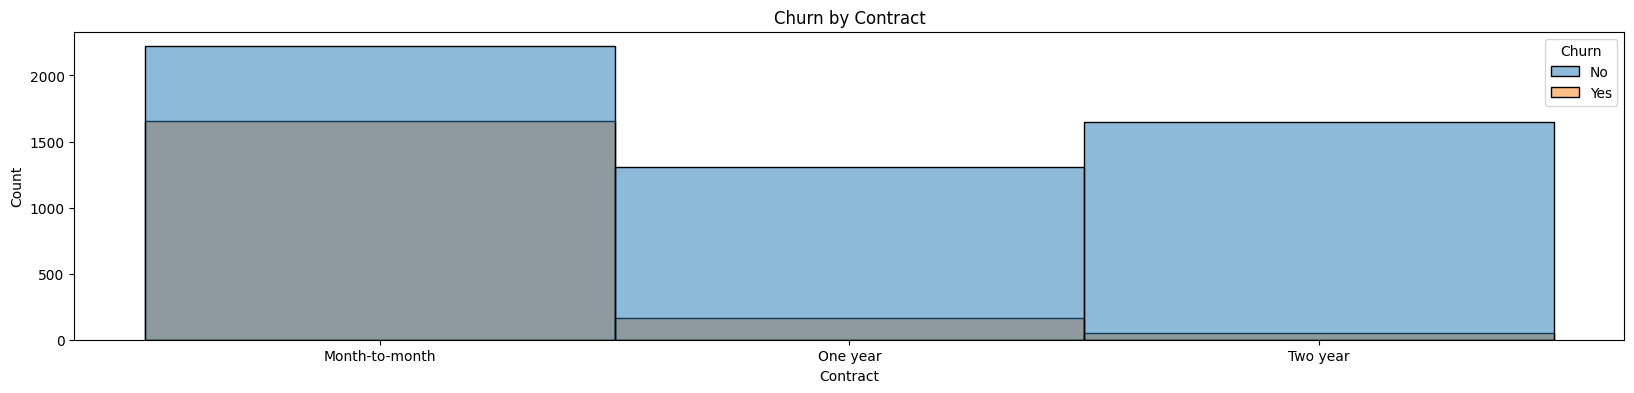

In [27]:
plt.figure(figsize = (20,4))
sns.histplot(x ='Contract',data = df, hue = "Churn")
plt.title("Churn by Contract")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

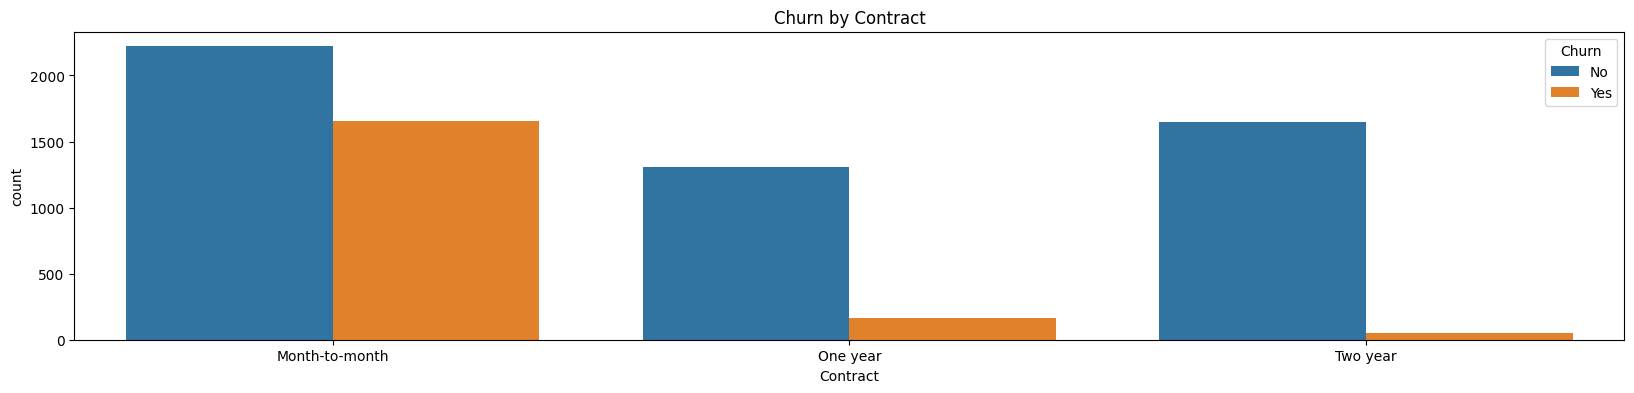

In [28]:
plt.figure(figsize = (20,4))
sns.countplot(x ='Contract',data = df, hue = "Churn")
plt.title("Churn by Contract")
plt.show

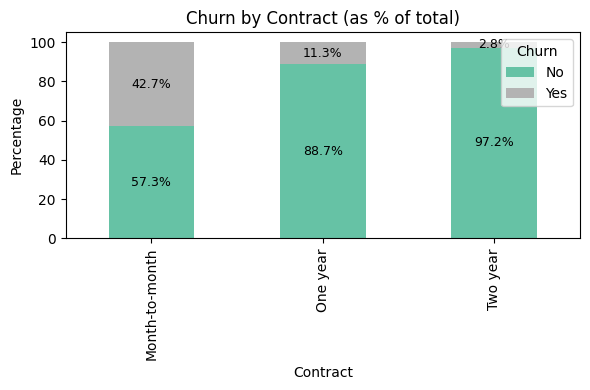

In [29]:
total = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100

# Step 2: Plot stacked bar chart
total.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Set2')

# Step 3: Add labels
for i, row in enumerate(total.values):
    bottom = 0
    for j, val in enumerate(row):
        plt.text(i, bottom + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=9)
        bottom += val

# Step 4: Set title and labels
plt.title("Churn by Contract (as % of total)")
plt.xlabel("Contract")
plt.ylabel("Percentage")
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

### Based on "Features" who churn the company 

In [33]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

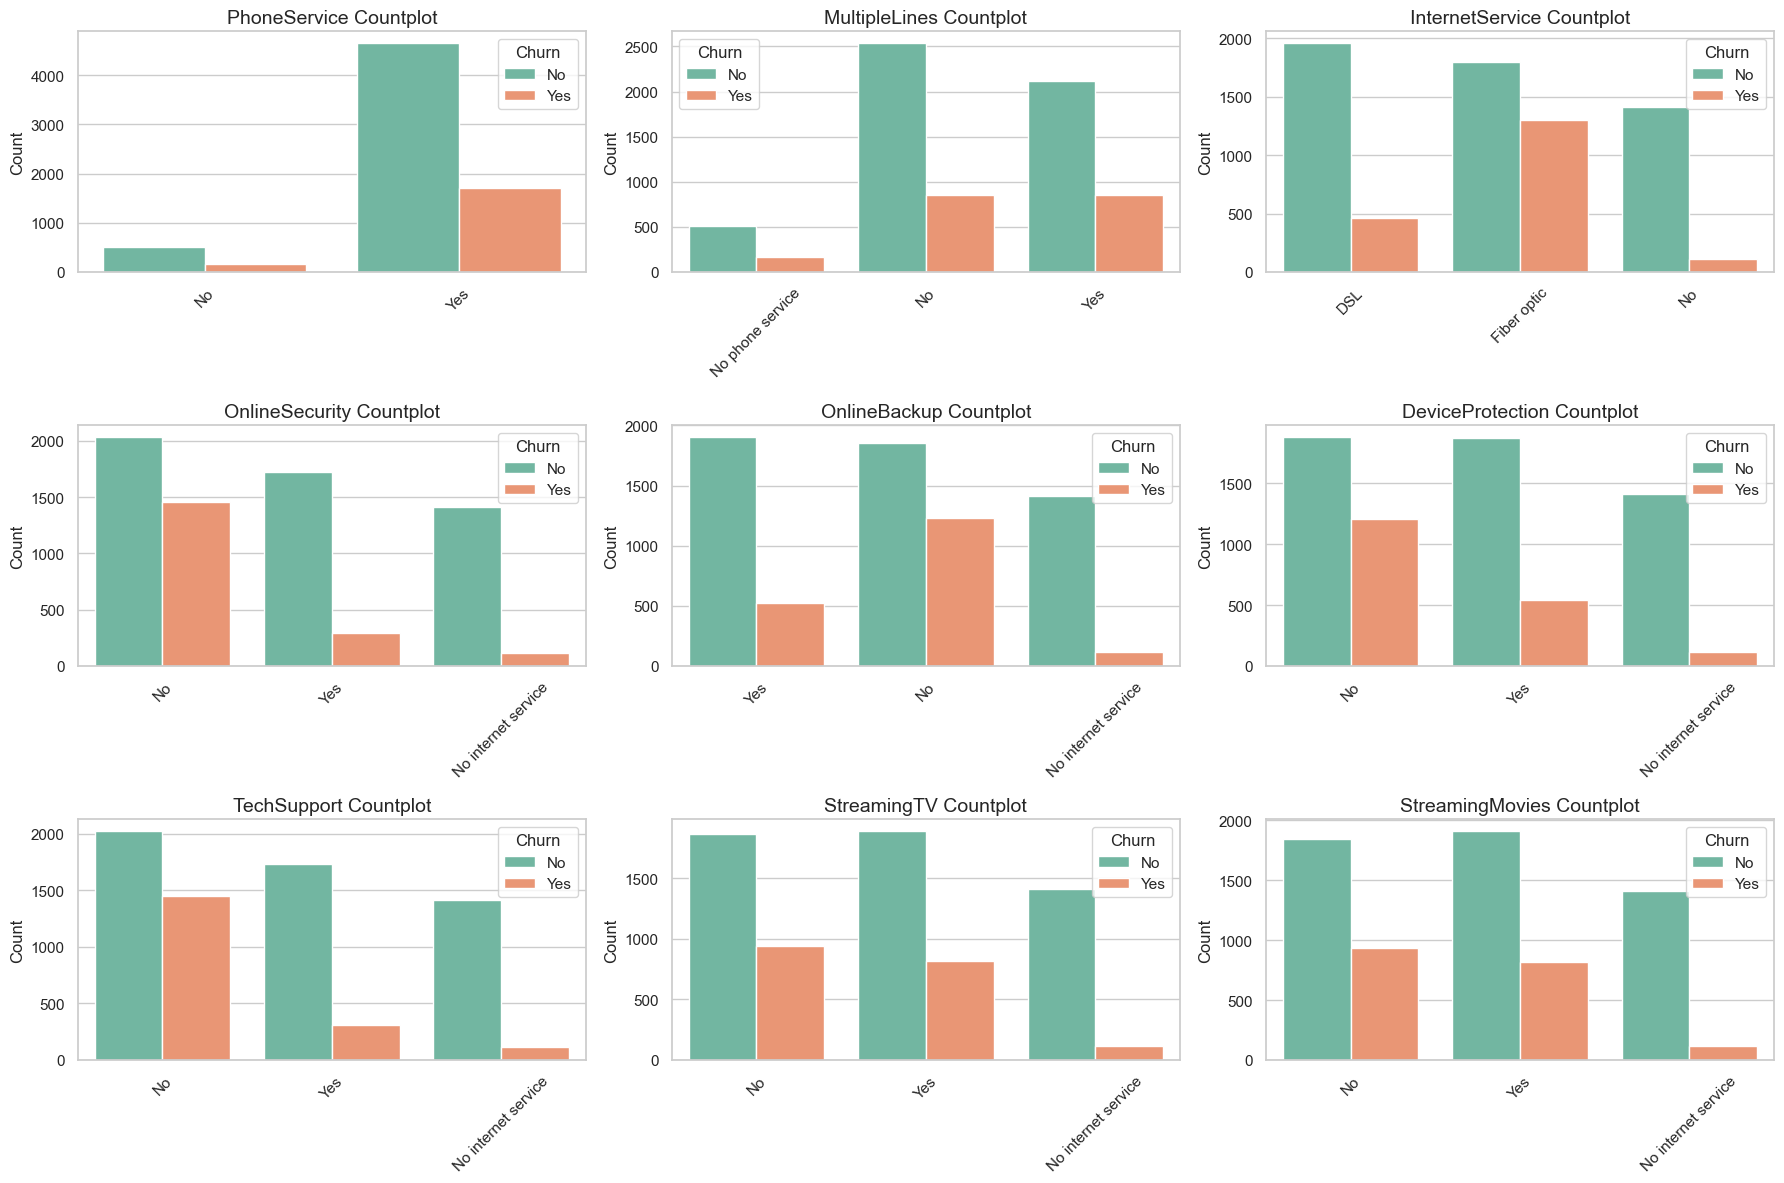

In [44]:
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set the plot style
sns.set(style="whitegrid")

# Create subplots: 3 rows × 3 columns
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()  # make it easier to iterate

# Loop through each column and draw countplot
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i],palette="Set2",hue = "Churn")
    axes[i].set_title(f'{col} Countplot', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # rotate x labels for clarity

# Adjust layout
plt.tight_layout()
plt.show()

 ### Based on "Features" who churn the company

<function matplotlib.pyplot.show(close=None, block=None)>

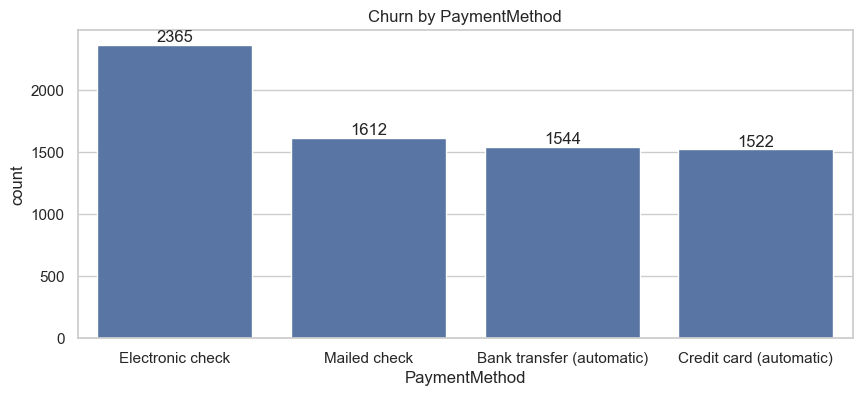

In [46]:
plt.figure(figsize = (10,4))
ax = sns.countplot(x ='PaymentMethod',data = df)
ax.bar_label(ax.containers[0])
plt.title("Churn by PaymentMethod")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

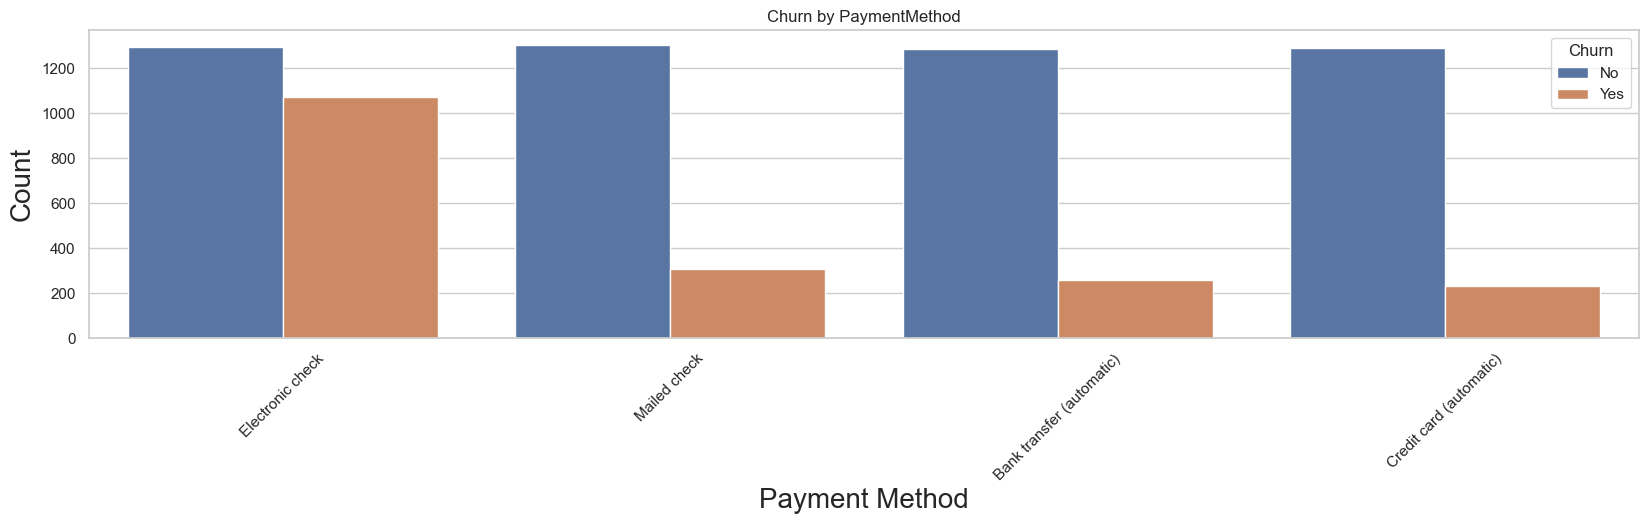

In [56]:
plt.figure(figsize = (20,4))
sns.countplot(x ='PaymentMethod',data = df, hue = "Churn")
plt.title("Churn by PaymentMethod")
plt.xlabel("Payment Method",size = 20)
plt.ylabel("Count",size = 20)
plt.xticks(rotation = 45)   # rotation of text 
plt.show